In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('/content/Preprocessed Fake Reviews Detection Dataset.csv')
df.head()

,Unnamed: 0,category,rating,label,text_
0,0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort love pretti
1,1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin 've mine coupl year
2,2,Home_and_Kitchen_5,5.0,CG,pillow save back love look feel pillow
3,3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price
4,4,Home_and_Kitchen_5,5.0,CG,nice set good qualiti set two month


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.dropna(inplace=True)
df['length'] = df['text_'].apply(len)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40431 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40431 non-null  object 
 1   rating    40431 non-null  float64
 2   label     40431 non-null  object 
 3   text_     40431 non-null  object 
 4   length    40431 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.9+ MB


In [ ]:
df.groupby('label').describe()

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
CG     20215.0  4.259906  1.141092  1.0  4.0  5.0  5.0  5.0  20215.0   
OR     20216.0  4.253265  1.147652  1.0  4.0  5.0  5.0  5.0  20216.0   

                                                                
             mean         std  min   25%    50%    75%     max  
label                                                           
CG     156.697650  158.316003  9.0  51.0   89.0  195.0  1198.0  
OR     222.869311  239.511782  8.0  69.0  125.0  276.0  2190.0

In [ ]:
df['text_'] = df['text_'].fillna('')

**MACHINE LEARNING MODELS**

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset and split into features and target
df = pd.read_csv('Preprocessed Fake Reviews Detection Dataset.csv')
df['text_'] = df['text_'].fillna('')
X = df['text_']  # Text feature (reviews)
y = df['label']  # Target variable (fake or genuine)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,y_pred)*100,2)) + '%')

Accuracy: 0.8632372944231482

Classification Report:
               precision    recall  f1-score   support

          CG       0.87      0.85      0.86      4016
          OR       0.86      0.88      0.87      4071

    accuracy                           0.86      8087
   macro avg       0.86      0.86      0.86      8087
weighted avg       0.86      0.86      0.86      8087

Model Prediction Accuracy: 86.32%


**MULTINOMIAL NAIVE BAYES REGRESSION**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Load the dataset and handle missing text data
df = pd.read_csv('Preprocessed Fake Reviews Detection Dataset.csv')
df['text_'] = df['text_'].fillna('')  # Fill NaN values with an empty string

# Define features and target
X = df['text_']  # Text feature (reviews)
y = df['label']  # Target variable (fake or genuine)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Initialize and train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,y_pred)*100,2)) + '%')


Accuracy: 0.8443180413008532

Classification Report:
               precision    recall  f1-score   support

          CG       0.82      0.87      0.85      4016
          OR       0.87      0.81      0.84      4071

    accuracy                           0.84      8087
   macro avg       0.85      0.84      0.84      8087
weighted avg       0.85      0.84      0.84      8087

Model Prediction Accuracy: 84.43%


**SUPPORT VECTOR CLASSIFIER**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Load the dataset and handle missing text data
df = pd.read_csv('Preprocessed Fake Reviews Detection Dataset.csv')
df['text_'] = df['text_'].fillna('')  # Fill NaN values with an empty string

# Define features and target
X = df['text_']  # Text feature (reviews)
y = df['label']  # Target variable (fake or genuine)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Initialize and train the SVC model
model = SVC(kernel='linear', random_state=42)  # Using a linear kernel for text data
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,y_pred)*100,2)) + '%')


Accuracy: 0.8713985408680599

Classification Report:
               precision    recall  f1-score   support

          CG       0.87      0.87      0.87      4016
          OR       0.87      0.87      0.87      4071

    accuracy                           0.87      8087
   macro avg       0.87      0.87      0.87      8087
weighted avg       0.87      0.87      0.87      8087

Model Prediction Accuracy: 87.14%


**RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Load the dataset and handle missing text data
df = pd.read_csv('Preprocessed Fake Reviews Detection Dataset.csv')
df['text_'] = df['text_'].fillna('')  # Fill NaN values with an empty string

# Define features and target
X = df['text_']  # Text feature (reviews)
y = df['label']  # Target variable (fake or genuine)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,y_pred)*100,2)) + '%')


Accuracy: 0.8439470755533572

Classification Report:
               precision    recall  f1-score   support

          CG       0.83      0.87      0.85      4016
          OR       0.86      0.82      0.84      4071

    accuracy                           0.84      8087
   macro avg       0.84      0.84      0.84      8087
weighted avg       0.84      0.84      0.84      8087

Model Prediction Accuracy: 84.39%


**DECISION TREE MODEL**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Load the dataset and handle missing text data
df = pd.read_csv('Preprocessed Fake Reviews Detection Dataset.csv')
df['text_'] = df['text_'].fillna('')  # Fill NaN values with an empty string

# Define features and target
X = df['text_']  # Text feature (reviews)
y = df['label']  # Target variable (fake or genuine)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,y_pred)*100,2)) + '%')


Accuracy: 0.73723259552368

Classification Report:
               precision    recall  f1-score   support

          CG       0.73      0.74      0.74      4016
          OR       0.74      0.74      0.74      4071

    accuracy                           0.74      8087
   macro avg       0.74      0.74      0.74      8087
weighted avg       0.74      0.74      0.74      8087

Model Prediction Accuracy: 73.72%


**K-NEAREST NEIGHBOUR**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Load the dataset and handle missing text data
df = pd.read_csv('Preprocessed Fake Reviews Detection Dataset.csv')
df['text_'] = df['text_'].fillna('')  # Fill NaN values with an empty string

# Define features and target
X = df['text_']  # Text feature (reviews)
y = df['label']  # Target variable (fake or genuine)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Initialize and train the KNN model
model = KNeighborsClassifier(n_neighbors=5)  # n_neighbors=5 by default, can adjust for tuning
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(y_test,y_pred)*100,2)) + '%')

Accuracy: 0.6552491653270681

Classification Report:
               precision    recall  f1-score   support

          CG       0.60      0.93      0.73      4016
          OR       0.85      0.38      0.53      4071

    accuracy                           0.66      8087
   macro avg       0.72      0.66      0.63      8087
weighted avg       0.72      0.66      0.63      8087

Model Prediction Accuracy: 65.52%


**PCA** **PRINCIPAL COMPONENT ANALYSIS**

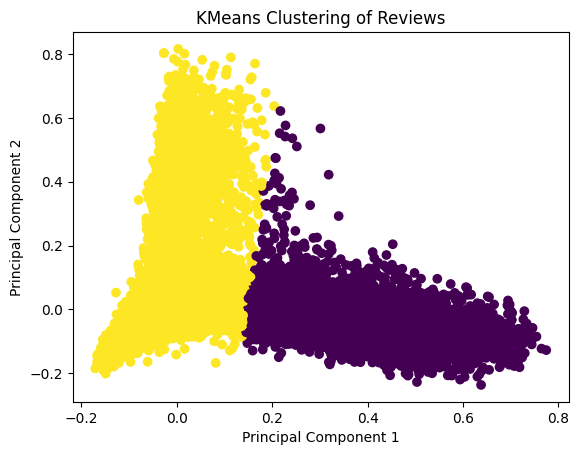

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset (replace with your file and column names)
df = pd.read_csv('Preprocessed Fake Reviews Detection Dataset.csv')
df['text_'] = df['text_'].fillna('')  # Handle missing values

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

# Transform the text data into TF-IDF features
tfidf_features = tfidf.fit_transform(df['text_'])

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(tfidf_features.toarray())  # Convert sparse matrix to dense array

# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)

# Visualize clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("KMeans Clustering of Reviews")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
